# K-nearest neighbors

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

## Load data

In [2]:
iris = datasets.load_iris()


In [3]:
# we only take the first two features
X = iris.data[:, :2]
X[0:8]


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4]])

In [4]:
y = iris.target
y[0:8]


array([0, 0, 0, 0, 0, 0, 0, 0])

## KNN model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X, y)


KNeighborsClassifier()

## Some predictions

In [6]:
y_pred = clf.predict(X)

rl = np.random.randint(100, size=(20))
print("pred", y_pred[rl])
print("true", y[rl])


pred [0 0 0 0 0 1 1 2 1 0 1 0 1 1 1 0 1 0 0 0]
true [0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0]


## Plot

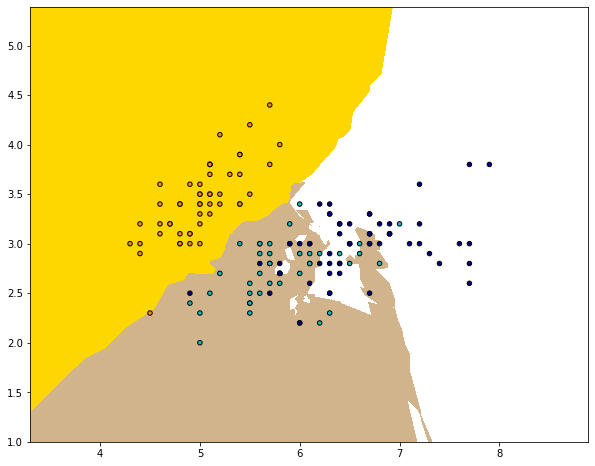

In [7]:
h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['gold', 'tan', 'w'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])


# Plot the decision boundary. 
# We will assign a color to each point in the mesh [x_min, x_max]X[y_min, y_max].
# Define bounds
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Build the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Collect the predictions over the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()